In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
sonar_data=pd.read_csv('Sonar.csv',header=None)

In [11]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.shape

(207, 61)

In [12]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
sonar_data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,0.2118,0.2575,0.2354,0.1334,0.0092,0.1951,0.3685,0.4646,0.5418,0.6260,0.7420,0.8257,0.8609,0.8400,0.8949,0.9945,1.0000,0.9649,0.8747,0.6257,0.2184,0.2945,0.3645,0.5012,0.7843,0.9361,0.8195,0.6207,0.4513,0.3004,0.2674,0.2241,0.3141,0.3693,0.2986,0.2226,0.0849,0.0359,0.0289,0.0122,0.0045,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M,1
0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,0.0994,0.2250,0.2444,0.3239,0.3039,0.2410,0.0367,0.1672,0.3038,0.4069,0.3613,0.1994,0.4611,0.6849,0.7272,0.7152,0.7102,0.8516,1.0000,0.7690,0.4841,0.3717,0.6096,0.5110,0.2586,0.0916,0.0947,0.2287,0.3480,0.2095,0.1901,0.2941,0.2211,0.1524,0.0746,0.0606,0.0692,0.0446,0.0344,0.0082,0.0108,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R,1
0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,0.0937,0.1245,0.1599,0.1542,0.1846,0.1732,0.1477,0.1748,0.1455,0.1579,0.2257,0.1975,0.3368,0.5828,0.8505,1.0000,0.8457,0.6624,0.5564,0.3925,0.3233,0.2054,0.1920,0.2227,0.3147,0.2268,0.0795,0.0748,0.1166,0.1969,0.2619,0.2507,0.1983,0.0948,0.0931,0.0965,0.0381,0.0435,0.0336,0.0055,0.0079,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,R,1
0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,0.0492,0.0996,0.1424,0.1194,0.0628,0.0907,0.1177,0.1429,0.1223,0.1104,0.1847,0.3715,0.4382,0.5707,0.6654,0.7476,0.7654,0.8555,0.9720,0.9221,0.7502,0.7209,0.7757,0.6055,0.5021,0.4499,0.3947,0.4281,0.4427,0.3749,0.1972,0.0511,0.0793,0.1269,0.1533,0.0690,0.0402,0.0534,0.0228,0.0073,0.0062,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R,1
0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,0.3265,0.3263,0.2301,0.1253,0.2102,0.2401,0.1928,0.1673,0.1228,0.0902,0.1557,0.3291,0.5268,0.6740,0.7906,0.8938,0.9395,0.9493,0.9040,0.9151,0.8828,0.8086,0.7180,0.6720,0.6447,0.6879,0.6241,0.4936,0.4144,0.4240,0.4546,0.4392,0.4323,0.4921,0.4710,0.3196,0.2241,0.1806,0.0990,0.0251,0.0129,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1083,0.1070,0.0257,0.0837,0.0748,0.1125,0.3322,0.4590,0.5526,0.5966,0.5304,0.2251,0.2402,0.2689,0.6646,0.6632,0.1674,0.0837,0.4331,0.8718,0.7992,0.3712,0.1703,0.1611,0.2086,0.2847,0.2211,0.6134,0.5807,0.6925,0.3825,0.4303,0.7791,0.8703,1.0000,0.9212,0.9386,0.9303,0.7314,0.4791,0.2087,0.2016,0.1669,0.2872,0.4374,0.3097,0.1578,0.0553,0.0334,0.0209,0.0172,0.0180,0.0110,0.0234,0.0276,0.0032,0.0084,0.0122,0.0082,0.0143,M,1
0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,0.4733,0.2362,0.1023,0.2904,0.4713,0.4659,0.1415,0.0849,0.3257,0.9007,0.9312,0.4856,0.1346,0.1604,0.2737,0.5609,0.3654,0.6139,0.5470,0.8474,0.5638,0.5443,0.5086,0.6253,0.8497,0.8406,0.8420,0.9136,0.7713,0.4882,0.3724,0.4469,0.4586,0.4491,0.5616,0.4305,0.0945,0.0794,0.0274,0.0154,0.0140,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,M,1
0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,0.3816,0.0991,0.0616,0.1795,0.3907,0.3602,0.3041,0.2428,0.4060,0.8395,0.9777,0.4680,0.0610,0.2143,0.1348,0.2854,0.1617,0.2649,0.4565,0.6502,0.2848,0.3296,0.5370,0.6627,0.8626,0.8547,0.7848,0.9016,0.8827,0.6086,0.2810,0.0906,0.1177,0.2694,0.5214,0.4232,0.2340,0.1928,0.1092,0.0507,0.0228,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086,M,1


In [14]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [15]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [16]:
#separating the data
X=sonar_data.drop(columns=60,axis=1)
y=sonar_data[60]

In [17]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [18]:
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [19]:
#train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=1)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [21]:
print(X_test)

         0       1       2       3       4       5       6       7       8   \
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
81   0.0100  0.0194  0.0155  0.0489  0.0839  0.1009  0.1627  0.2071  0.2696   
82   0.0409  0.0421  0.0573  0.0130  0.0183  0.1019  0.1054  0.1070  0.2302   
109  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
176  0.0635  0.0709  0.0453  0.0333  0.0185  0.1260  0.1015  0.1918  0.3362   
134  0.1083  0.1070  0.0257  0.0837  0.0748  0.1125  0.3322  0.4590  0.5526   
96   0.0181  0.0146  0.0026  0.0141  0.0421  0.0473  0.0361  0.0741  0.1398   
98   0.1313  0.2339  0.3059  0.4264  0.4010  0.1791  0.1853  0.0055  0.1929   
57   0.0216  0.0124  0.0174  0.0152  0.0608  0.1026  0.1139  0.0877  0.1160   
169  0.0130  0.0120  0.0436  0.0624  0.0428  0.0349 

In [22]:
print(X_test)

         0       1       2       3       4       5       6       7       8   \
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
81   0.0100  0.0194  0.0155  0.0489  0.0839  0.1009  0.1627  0.2071  0.2696   
82   0.0409  0.0421  0.0573  0.0130  0.0183  0.1019  0.1054  0.1070  0.2302   
109  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
176  0.0635  0.0709  0.0453  0.0333  0.0185  0.1260  0.1015  0.1918  0.3362   
134  0.1083  0.1070  0.0257  0.0837  0.0748  0.1125  0.3322  0.4590  0.5526   
96   0.0181  0.0146  0.0026  0.0141  0.0421  0.0473  0.0361  0.0741  0.1398   
98   0.1313  0.2339  0.3059  0.4264  0.4010  0.1791  0.1853  0.0055  0.1929   
57   0.0216  0.0124  0.0174  0.0152  0.0608  0.1026  0.1139  0.0877  0.1160   
169  0.0130  0.0120  0.0436  0.0624  0.0428  0.0349 

In [23]:
#model training
model=LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
#model eval
train_pred=model.predict(X_train)
training_data_Accuracy=accuracy_score(y_train,train_pred)

In [27]:
print("the accuray to the training data is",str(training_data_Accuracy*100)+str('%'))

the accuray to the training data is 83.42245989304813%


In [28]:
#accuracy to the test data is
test_pred=model.predict(X_test)
test_data_Accuracy=accuracy_score(y_test,test_pred)

In [29]:
print(" the accuracy to the test data is :",str(test_data_Accuracy*100)+str('%'))

 the accuracy to the test data is : 76.19047619047619%


In [39]:
row_data = sonar_data.iloc[0:59]

In [41]:
input_data=[0.02, 0.037, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
                       0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.0660, 0.2273,
                       0.3100, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.5550,
                       0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857, 0.1307, 0.2604,
                       0.5127, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
                       0.0510, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
                       0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
                       0.0180, 0.0084, 0.0090, 0.0032]
input_as_numpy_array=np.asarray(input_data)
input_reshaped=input_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)
if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock


In [31]:
import matplotlib.pyplot as plt

In [33]:
training_data_Accuracy = [0.6, 0.72, 0.81, 0.87, 0.9]
test_data_Accuracy = [0.58, 0.7, 0.76, 0.8, 0.82]


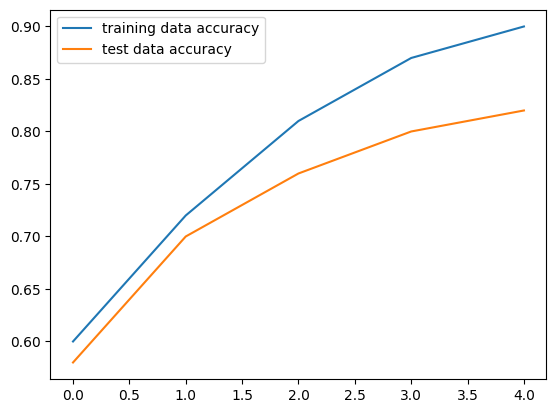

In [34]:
plt.plot(training_data_Accuracy,label='training data accuracy')
plt.plot(test_data_Accuracy,label='test data accuracy')
plt.legend()
plt.show()

In [ ]:
#  doneee by Prashanna Tiwari